In [16]:
import pandas as pd
import os, sys
import gzip

In [22]:
path = "/scratch/tweber/DATA/1000G_SNV_with_GT/GENOTYPING"
l = list()
for vcf in os.listdir(path):
    if vcf.endswith(".vcf.gz"):
        skip = len([e.decode("utf-8").split('\n') for e in gzip.open("{file}".format(file=path + "/" + vcf), "rb") if e.decode("utf-8").split('\n')[0].startswith("##")])
        df = pd.read_csv(path + "/" + vcf, compression='gzip', skiprows=skip, sep="\t")
        l.append({"Sample" : vcf.split('_')[0], "Cell" : vcf.split('_')[1].replace(".vcf.gz", ""), "Nb_SNP" : df.shape[0]})
        
snp_df = pd.DataFrame(l)

In [34]:
snp_df

,Sample,Cell,Nb_SNP
0,HG02059,326,215
1,NA19239,055,361
2,NA19239,029,680
3,HG02059,348,83
4,NA19239,090,208
5,HG00731,030,544
6,NA19240,081,1164
7,HG00268,404,33
8,HG02059,361,22
9,HG00514,095,431


['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chrX']

In [42]:
path = "/scratch/tweber/DATA/1000G_SNV_with_GT/COVERAGE"
l = list()
chroms = ["chr" + str(e) for e in list(range(1,23))] + ["chrX"]
for file in os.listdir(path):
    df = pd.read_csv(path + "/" + file, sep="\t")
    df = df.loc[df["#rname"].isin(chroms)]
    df["Sample"] = file.split('_')[0]
    df["Cell"] = file.split('_')[1].replace(".txt", "")
    l.append(df)
coverage_df = pd.concat(l)
coverage_df_summary = coverage_df.groupby(["Sample", "Cell"])["meandepth"].mean().reset_index()
coverage_df_summary

,Sample,Cell,meandepth
0,HG00268,401,0.022892
1,HG00268,402,0.015421
2,HG00268,404,0.011401
3,HG00268,438,0.020335
4,HG00268,455,0.016738
5,HG00512,015,0.070050
6,HG00512,017,0.075178
7,HG00512,075,0.090950
8,HG00512,081,0.029838
9,HG00512,087,0.030555


In [73]:
path = "/scratch/tweber/DATA/1000G_SNV_with_GT/ANALYSIS"
l = list()
for e in os.listdir(path):
    if "summary" in e:
        tmp_df = pd.read_csv(path + "/" + e, sep="\t")
        tmp_df["Query_sample"] = e.split('_')[0]
        tmp_df["Cell"] = e.split('_')[1]
        tmp_df["Rank"] = list(range(1,1+tmp_df.shape[0]))
        l.append(tmp_df)
concat_df = pd.concat(l)


In [26]:
concat_df

,Sample,Overlap_size,Query_sample,Cell,Nb
0,NA19239,76,NA19239,055,1
1,NA19240,43,NA19239,055,2
2,HG03583,13,NA19239,055,3
3,HG03472,12,NA19239,055,4
4,HG03195,11,NA19239,055,5
...,...,...,...,...,...
3197,HG03731,0,HG00268,401,3198
3198,HG03729,0,HG00268,401,3199
3199,HG03727,0,HG00268,401,3200
3200,HG03725,0,HG00268,401,3201


In [75]:
equal_df = concat_df.loc[concat_df["Sample"] == concat_df["Query_sample"]]
equal_df = pd.merge(equal_df, snp_df, on=["Sample", "Cell"])
equal_df = pd.merge(equal_df, coverage_df_summary, on=["Sample", "Cell"])
equal_df["ID"] = equal_df["Sample"] + " - " + equal_df["Cell"]
equal_df = equal_df.sort_values(by="ID")
equal_df = equal_df[["ID", "Sample", "Cell", "Overlap_size", "Nb_SNP", "Rank", "meandepth"]]
equal_df

,ID,Sample,Cell,Overlap_size,Nb_SNP,Rank,meandepth
41,HG00268 - 401,HG00268,401,12,146,1,0.022892
5,HG00268 - 402,HG00268,402,4,55,1,0.015421
10,HG00268 - 404,HG00268,404,3,33,1,0.011401
31,HG00268 - 438,HG00268,438,8,62,1,0.020335
26,HG00268 - 455,HG00268,455,5,53,1,0.016738
39,HG00512 - 015,HG00512,015,98,1425,1,0.070050
40,HG00512 - 017,HG00512,017,98,1468,1,0.075178
7,HG00512 - 075,HG00512,075,131,1880,1,0.090950
6,HG00512 - 081,HG00512,081,17,481,1,0.029838
35,HG00512 - 087,HG00512,087,32,525,1,0.030555


In [61]:
equal_df.meandepth.describe()

count    42.000000
mean      0.040660
std       0.027648
min       0.009139
25%       0.020907
50%       0.030445
75%       0.054259
max       0.147677
Name: meandepth, dtype: float64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'HG00268 - 401'),
 Text(1, 0, 'HG00268 - 402'),
 Text(2, 0, 'HG00268 - 404'),
 Text(3, 0, 'HG00268 - 438'),
 Text(4, 0, 'HG00268 - 455'),
 Text(5, 0, 'HG00512 - 015'),
 Text(6, 0, 'HG00512 - 017'),
 Text(7, 0, 'HG00512 - 075'),
 Text(8, 0, 'HG00512 - 081'),
 Text(9, 0, 'HG00512 - 087'),
 Text(10, 0, 'HG00512 - 092'),
 Text(11, 0, 'HG00514 - 008'),
 Text(12, 0, 'HG00514 - 015'),
 Text(13, 0, 'HG00514 - 020'),
 Text(14, 0, 'HG00514 - 023'),
 Text(15, 0, 'HG00514 - 073'),
 Text(16, 0, 'HG00514 - 089'),
 Text(17, 0, 'HG00514 - 095'),
 Text(18, 0, 'HG00731 - 019'),
 Text(19, 0, 'HG00731 - 030'),
 Text(20, 0, 'HG00731 - 086'),
 Text(21, 0, 'HG01352 - 402'),
 Text(22, 0, 'HG01352 - 410'),
 Text(23, 0, 'HG01352 - 424'),
 Text(24, 0, 'HG01352 - 442'),
 Text(25, 0, 'HG02059 - 308'),
 Text(26, 0, 'HG02059 - 326'),
 Text(27, 0, 'HG02059 - 337'),
 Text(28, 0, 'HG02059 - 348'),
 Text(29, 0, 'HG02059 - 361'),
 Text(30, 0, 'HG02818 - 308'),
 Text(31, 0, 'HG02818 - 312'),
 Text(32, 0, 'HG02

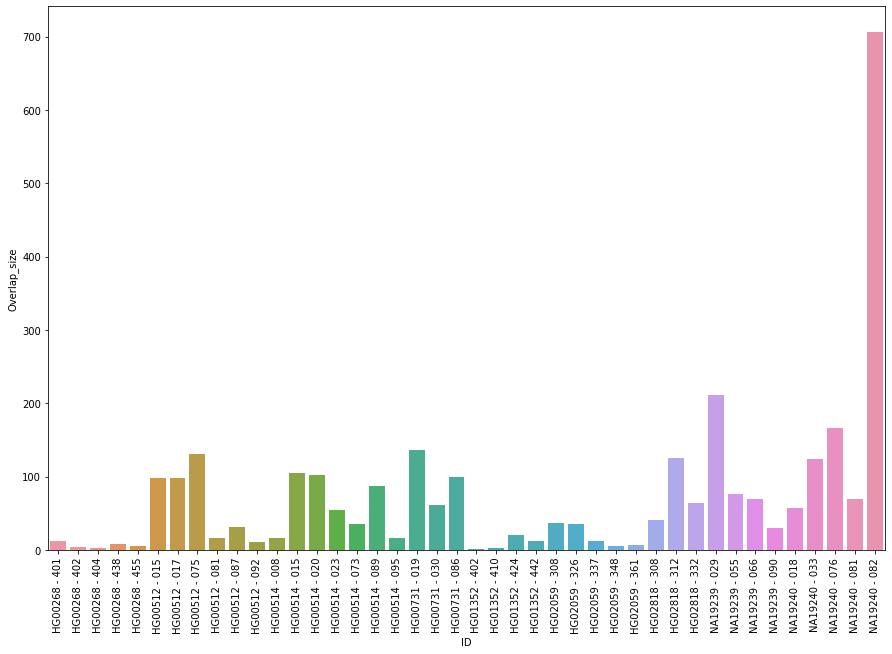

In [53]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=equal_df, x="ID", y="Overlap_size", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'HG00268 - 401'),
 Text(1, 0, 'HG00268 - 402'),
 Text(2, 0, 'HG00268 - 404'),
 Text(3, 0, 'HG00268 - 438'),
 Text(4, 0, 'HG00268 - 455'),
 Text(5, 0, 'HG00512 - 015'),
 Text(6, 0, 'HG00512 - 017'),
 Text(7, 0, 'HG00512 - 075'),
 Text(8, 0, 'HG00512 - 081'),
 Text(9, 0, 'HG00512 - 087'),
 Text(10, 0, 'HG00512 - 092'),
 Text(11, 0, 'HG00514 - 008'),
 Text(12, 0, 'HG00514 - 015'),
 Text(13, 0, 'HG00514 - 020'),
 Text(14, 0, 'HG00514 - 023'),
 Text(15, 0, 'HG00514 - 073'),
 Text(16, 0, 'HG00514 - 089'),
 Text(17, 0, 'HG00514 - 095'),
 Text(18, 0, 'HG00731 - 019'),
 Text(19, 0, 'HG00731 - 030'),
 Text(20, 0, 'HG00731 - 086'),
 Text(21, 0, 'HG01352 - 402'),
 Text(22, 0, 'HG01352 - 410'),
 Text(23, 0, 'HG01352 - 424'),
 Text(24, 0, 'HG01352 - 442'),
 Text(25, 0, 'HG02059 - 308'),
 Text(26, 0, 'HG02059 - 326'),
 Text(27, 0, 'HG02059 - 337'),
 Text(28, 0, 'HG02059 - 348'),
 Text(29, 0, 'HG02059 - 361'),
 Text(30, 0, 'HG02818 - 308'),
 Text(31, 0, 'HG02818 - 312'),
 Text(32, 0, 'HG02

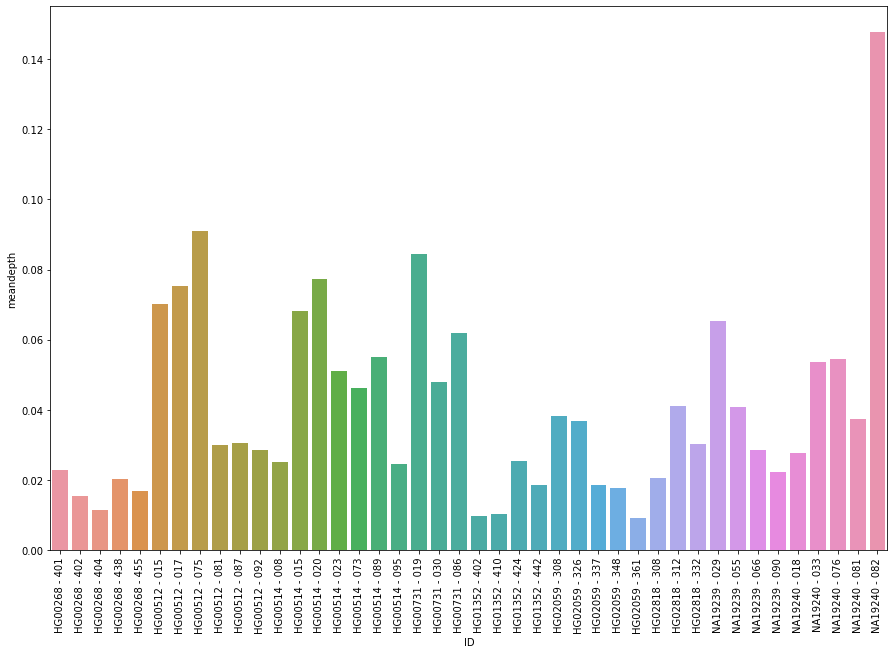

In [86]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=equal_df, x="ID", y="meandepth", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

(-33.2, 300.0)

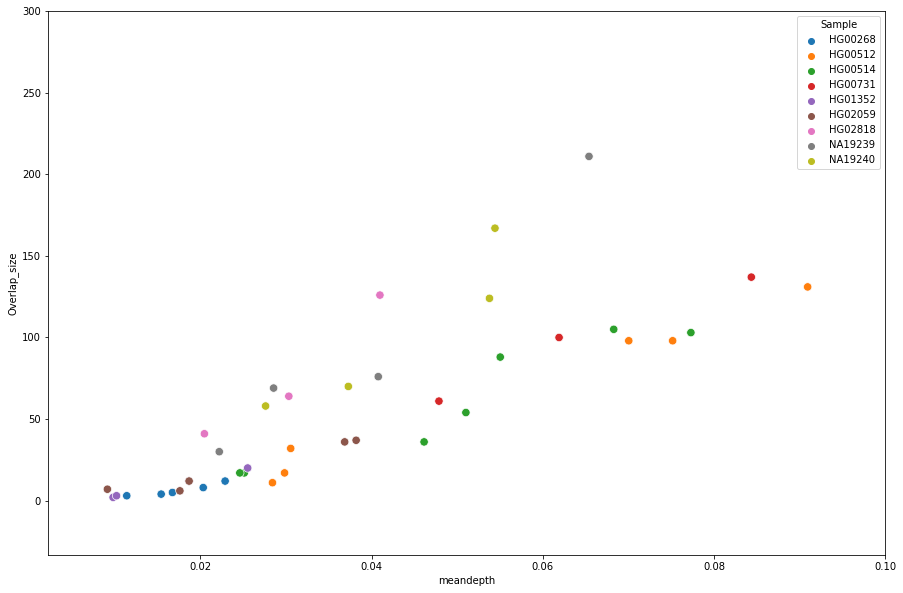

In [85]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=equal_df, x="meandepth", y="Overlap_size", hue="Sample", ax=ax, s=70)
ax.set_xlim(xmax=0.10)
ax.set_ylim(ymax=300)

/tmp/ipykernel_62714/397777405.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


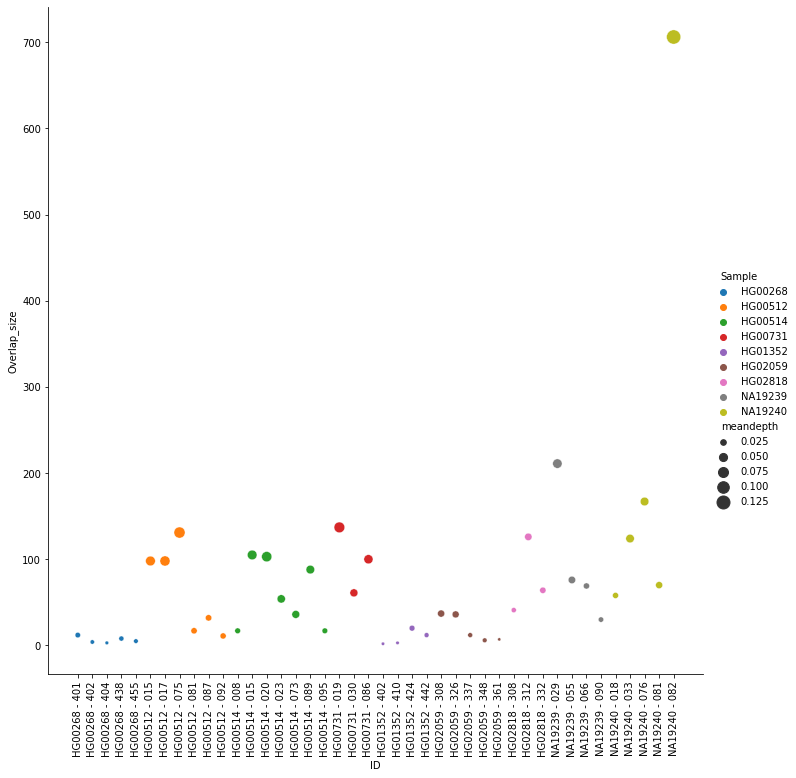

In [77]:
#f, ax = plt.subplots(figsize=(15,10))
for ax in sns.relplot(data=equal_df, x="ID", y="Overlap_size", hue="Sample", size="meandepth", sizes=(10, 200), height=10).axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)